<a href="https://colab.research.google.com/github/Winner121353/kyphosis/blob/master/gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv('Startup')

In [0]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
X = np.array(data[['R&D Spend','Administration','Marketing Spend']])

In [0]:
y = np.array(data['Profit'])
y = y.reshape(len(y),1)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [0]:
y_train.shape

(40, 1)

In [0]:
X_train[0:5]

array([[ 61136.38, 152701.92,  88218.23],
       [ 44069.95,  51283.14, 197029.42],
       [119943.24, 156547.42, 256512.92],
       [ 23640.93,  96189.63, 148001.11],
       [ 67532.53, 105751.03, 304768.73]])

In [0]:
y_train[0:5]

array([[ 97483.56],
       [ 89949.14],
       [132602.65],
       [ 71498.49],
       [108733.99]])

In [0]:
class GradientDecent:
    def __init__(self):
        self.weights = None
        self.weights = None
        self.cost_hist = None
    
    def train(self,X,y,epochs=100, alpha=0.01):
        if len(X) != len(y):
            raise ValueError()
        m = len(y)
        X = np.c_[np.ones((m,1)),X]
        n = X.shape[1]
        self.weights = np.random.rand(n,1)
        self.cost_hist = np.zeros(epochs)
        self.weights_hist = np.zeros((epochs,n))
        for epoch in range(epochs):
            pred = np.dot(X,self.weights)
            self.weights = self.weights - (1/m)*alpha*X.T.dot((pred-y))
            self.weights_hist[epoch,:] = self.weights.T
            self.cost_hist[epoch] = self.cal_cost(X,y)
    
    def cal_cost(self,X,y):
        m = len(y)
        pred = np.dot(X,self.weights)
        cost = (1/2*m)*np.sum(np.square(pred-y))
        return cost
    
    def predict(self,X):
        X = np.c_[np.ones((len(X),1)),X]
        pred = np.dot(X,self.weights)
        return pred

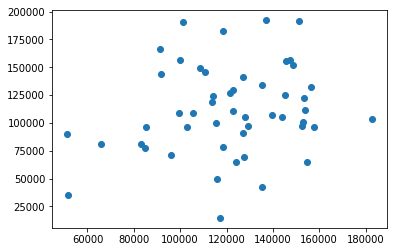

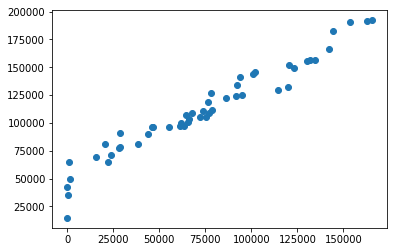

In [0]:
plt.scatter(X[:,1],y)
plt.show()
plt.scatter(X[:,0],y)
plt.show()

In [0]:
grad = GradientDecent()

In [0]:
grad.train(X_train,y_train,alpha=0.55)
grad.weights

C:\Users\BIPRAJIT MAL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\BIPRAJIT MAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square


array([[nan],
       [nan],
       [nan],
       [nan]])

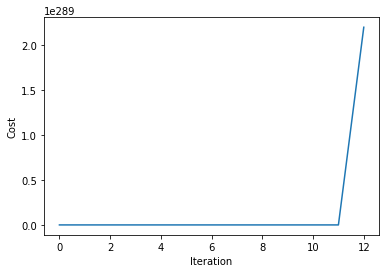

In [0]:
err = grad.cost_hist
plt.plot(err)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()